<a href="https://colab.research.google.com/github/achaudhury7378/TimeSeiresApplications/blob/main/Time_Seiers_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Library Import**

In [13]:
import pandas as pd
from random import seed
from random import random
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")

#**Data Import**

In [14]:
df = pd.read_csv('https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/nyc_energy_consumption.csv')

In [15]:
df['timeStamp']=pd.to_datetime(df['timeStamp'])
n_df=df.set_index('timeStamp')

#**Random Walk**

ARIMA(p,d,q) forecasting equation<br>
ARIMA(1,0,0) = first-order autoregressive model<br>
ARIMA(0,1,0) = random walk<br>
ARIMA(1,1,0) = differenced first-order autoregressive model<br>
ARIMA(0,1,1) without constant = simple exponential smoothing<br>
ARIMA(0,1,1) with constant = simple exponential smoothing with growth<br>
ARIMA(0,2,1) or (0,2,2) without constant = linear exponential smoothing<br>
ARIMA(1,1,2) with constant = damped-trend linear exponential smoothing<br>
Courtesy : <a href='https://people.duke.edu/~rnau/411arim.htm'>Introduction to ARIMA models</a>

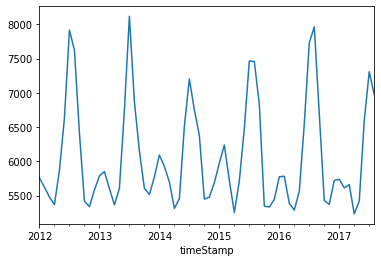

In [40]:
n_df_monthly=n_df.demand.resample('M').mean()
n_df_monthly.plot()

In [37]:
X = n_df.demand.dropna().values
size = int(len(X) * 0.95)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

predicted=6276.978703, expected=6211.217000
predicted=6211.244294, expected=6155.167000
predicted=6155.193092, expected=6088.033000
predicted=6088.057653, expected=6117.800000
predicted=6117.825290, expected=6015.442000
predicted=6015.465097, expected=5784.908000
predicted=5784.926157, expected=5454.850000
predicted=5454.861085, expected=5068.067000
predicted=5068.069797, expected=4742.225000
predicted=4742.220816, expected=4499.775000
predicted=4499.765622, expected=4345.483000
predicted=4345.470317, expected=4249.583000
predicted=4249.568261, expected=4228.875000
predicted=4228.859819, expected=4219.942000
predicted=4219.926628, expected=4345.725000
predicted=4345.712323, expected=4574.800000
predicted=4574.792230, expected=4810.742000
predicted=4810.739285, expected=5000.792000
predicted=5000.793357, expected=5115.392000
predicted=5115.395810, expected=5185.317000
predicted=5185.322308, expected=5170.550000
predicted=5170.554992, expected=5129.883000
predicted=5129.887121, expected=

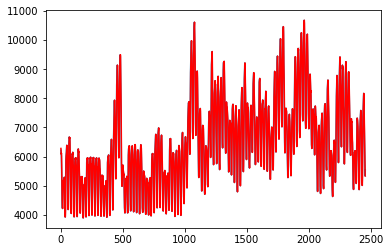

In [38]:
for t in range(len(test)):
	model = ARIMA(history, order=(0,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

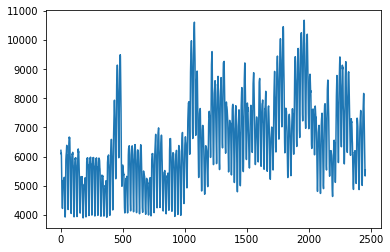

In [39]:
pyplot.plot(test)
pyplot.show()

In [46]:
X = n_df_monthly.values
size = int(len(X) * 0.9)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

predicted=5737.913325, expected=5611.792171
predicted=5609.403587, expected=5660.977832
predicted=5659.421091, expected=5232.217107
predicted=5223.879350, expected=5421.315935
predicted=5416.063124, expected=6597.990346
predicted=6610.921031, expected=7309.246677
predicted=7332.758053, expected=6971.501248
Test MSE: 322166.863


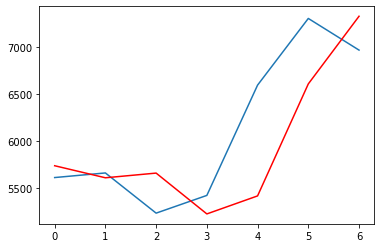

In [48]:
for t in range(len(test)):
	model = ARIMA(history, order=(0,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()